In [11]:
import pandas as pd
import numpy as np
import glob

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42

In [12]:
d = {}
for fpath in glob.glob('./*txt'):
    if 'PLDataLOGGED' in fpath:
        continue
    df = pd.read_csv(fpath, header=None, sep='  ', names=['x', 'y', 'group'])
    d[fpath] = df

In [13]:
def cmap_from_color(color, min_alpha=0.1, max_alpha=0.8, n_levels=10):
    color = matplotlib.colors.colorConverter.to_rgba(color, alpha=max_alpha)
    transparent = matplotlib.colors.colorConverter.to_rgba(color, alpha=0.0)
    c_list = [color] + [transparent] * (n_levels - 1)
    return matplotlib.colors.LinearSegmentedColormap.from_list('temp_cmap', c_list, n_levels)

for fpath, df in d.items():
    sns.set_palette('husl', n_colors=df['group'].unique().size)
    print("FILE: ", fpath)
    
    g = sns.JointGrid("x", "y", df, size=15, space=0)
    patches = []

    for group, values in df.groupby("group"):
        
        sns.kdeplot(values["x"], ax=g.ax_marg_x, shade=True, legend=False)
        ax = sns.kdeplot(values["y"], ax=g.ax_marg_y, vertical=True, shade=True, legend=False)
        
        color = ax.get_lines()[-1].get_color()
        patches.append(mpatches.Patch(color=color, label=group))
        
        sns.kdeplot(values["x"], values["y"], ax=g.ax_joint, cmap=cmap_from_color(color))
                    #shade=True, shade_lowest=False)
        g.ax_joint.scatter(values.x.mean(), values.y.mean(), color=color, s=25)
        
    g.fig.savefig(fpath[:-4]+'.svg', format="svg")
    plt.show()
    
    plt.legend(handles=patches)
    plt.savefig(fpath[:-4]+'LEGEND.png')
    plt.show()

In [10]:
# Read into pandas DataFrames
pl_df = pd.read_csv('PLData_TH_TR_ElementNum.txt', header=None, sep='  ',
                    names=['thickness', 'thinning', 'group'])
env_df = pd.read_csv('EnvironmentData_TH_TR_Enviro.txt', header=None, sep='  ',
                    names=['thickness', 'thinning', 'group'])
env_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


FileNotFoundError: [Errno 2] No such file or directory: 'PLData_TH_TR_ElementNum.txt'

Note: decided on zero offset by looking at the log10 of minimum nonzero value, then rounding down. (e.g., if `np.log10(pl_df.thinning[pl_df.thinning > 0].min()) = -4.7891`, then I add `10^{-5}` to the absolute values before taking the log.

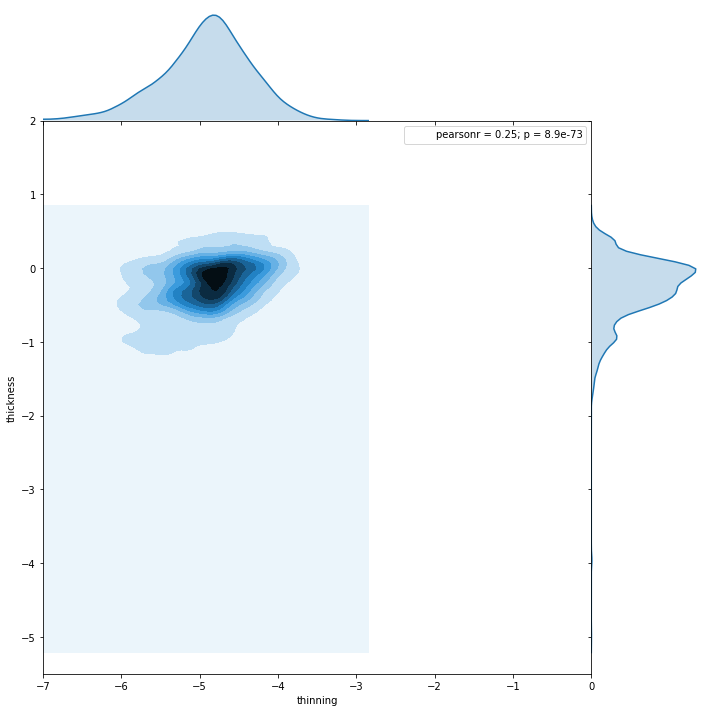

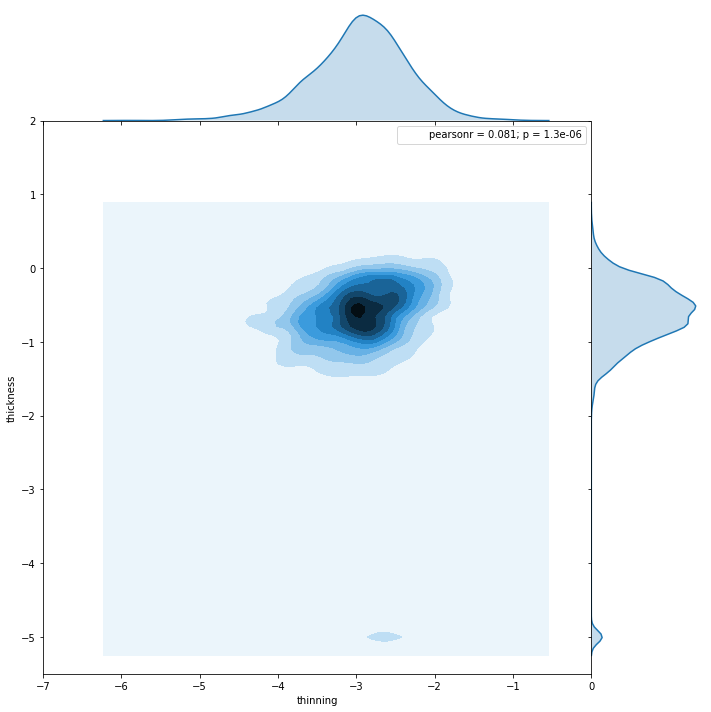

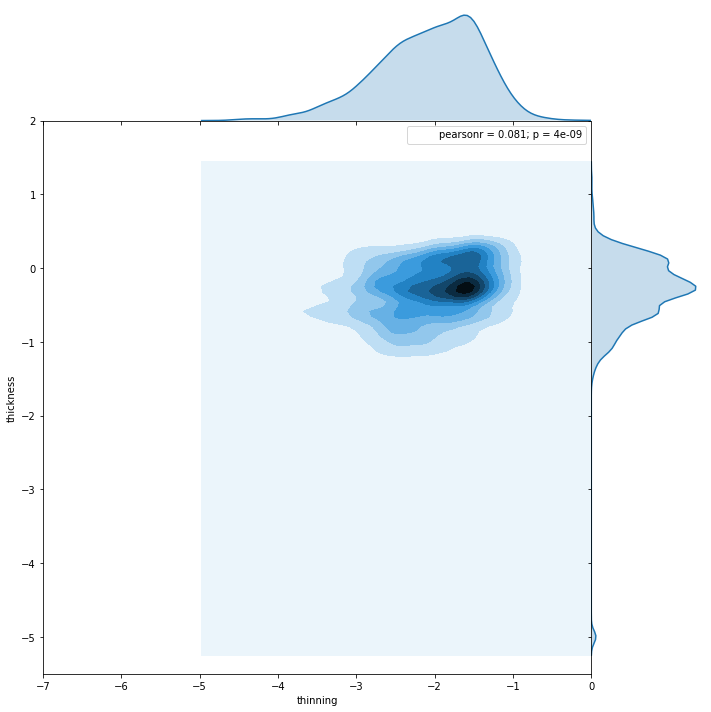

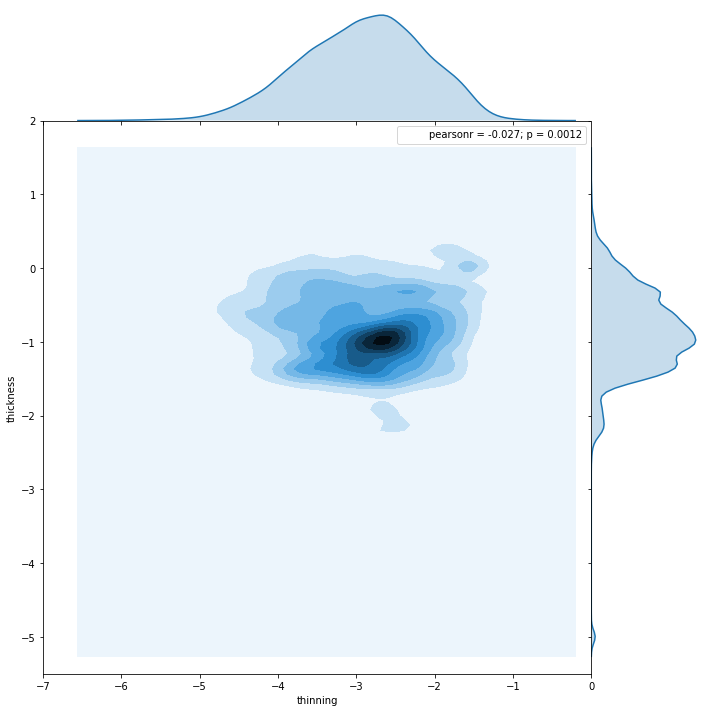

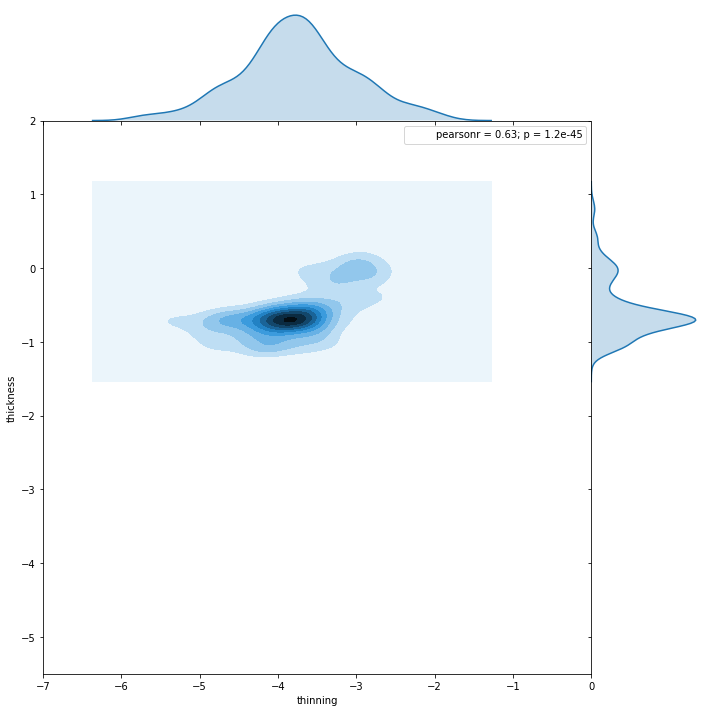

In [76]:
for title, group in env_df.groupby('group'):
    # note: thickness had some zeros in the env dataframe
    # size -- controls figure size
    # spacing -- between density plot and marginal distribution plots
    jp = sns.jointplot(np.log10(group.thinning.abs()), np.log10(group.thickness+0.00001),
                       kind='kde', size=10, space=0)
    
    # set axis parameters by accessing matplotlib axis attribute directly
    jp.ax_joint.set_ylim(-5.5,2)
    jp.ax_joint.set_xlim(-7,0)
    
    # get the matplotlib figure to save as svg
    fig = jp.fig
    fig.savefig("ENV_group"+str(int(title))+".svg", format="svg")

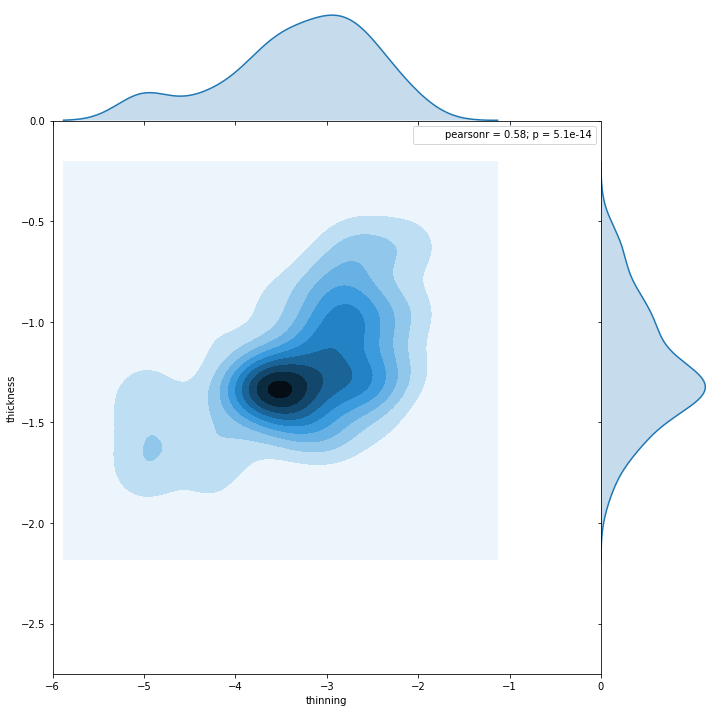

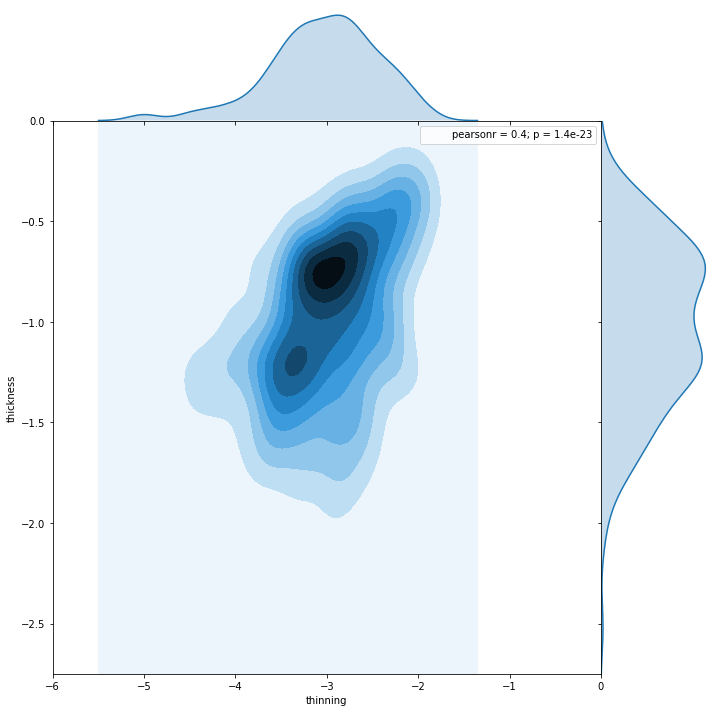

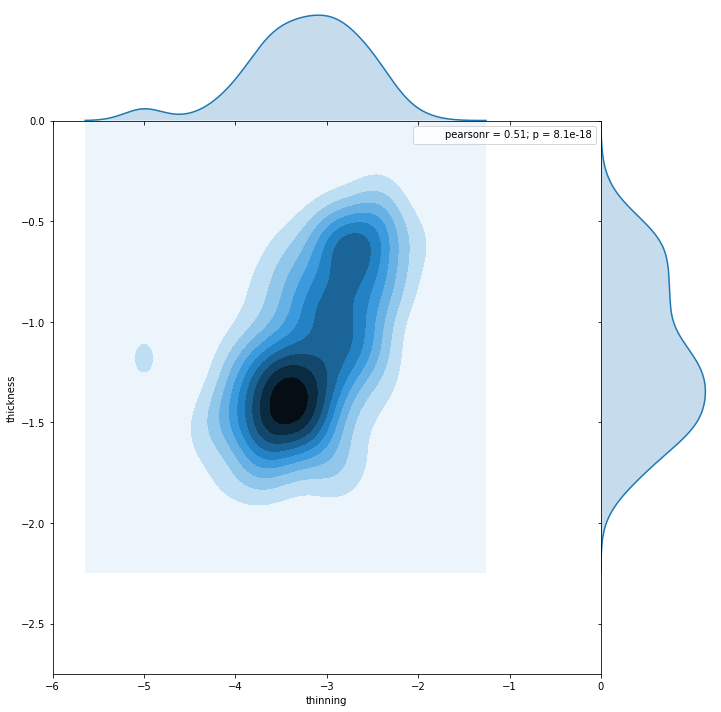

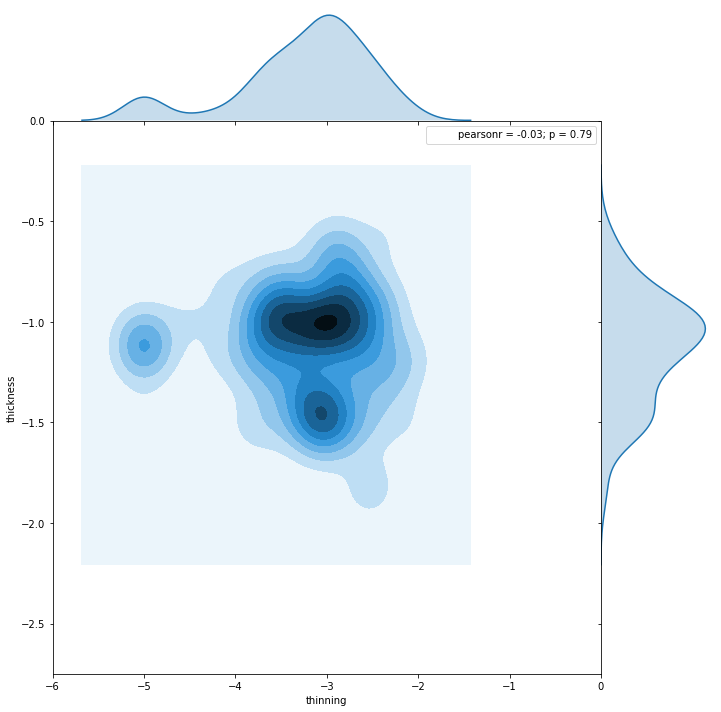

In [77]:
for title, group in pl_df.groupby('group'):
    jp = sns.jointplot(np.log10(group.thinning.abs()+0.00001),np.log10(group.thickness),
                       kind='kde', size=10, space=0)
    jp.ax_joint.set_ylim(-2.75,0)
    jp.ax_joint.set_xlim(-6,0)
    fig = jp.fig
    fig.savefig("PL_group"+str(int(title))+".svg", format="svg")

In [71]:
df.group.unique().size

5

In [88]:
'./LobeFacies_Dist_TR_Enviro.txt'[:-4]

'./LobeFacies_Dist_TR_Enviro'